In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Tasks

### Loading all datasets

In [198]:
cases_test = pd.read_csv('./datasets/cases_2021_test.csv', parse_dates=[7])
cases_location = pd.read_csv('./datasets/location_2021.csv')

## 1.1 Cleaning messy outcome labels
Datasets involved: cases_2021_train.csv

In [199]:
cases_train = pd.read_csv('./datasets/cases_2021_train.csv', parse_dates=[7])

In [200]:
cases_train.groupby('outcome').size()

outcome
Alive                               127
Dead                                  9
Death                                 4
Deceased                           3361
Died                                  4
Discharged                            2
Discharged from hospital              3
Hospitalized                     135524
Receiving Treatment                 183
Recovered                         62875
Stable                               24
Under treatment                     243
critical condition                    1
death                                29
died                                624
discharge                           114
discharged                           82
recovered                          2435
recovering at home 03.03.2020         2
released from quarantine              3
stable                              107
stable condition                     90
dtype: int64

In [201]:
# labels_test = {
#     'hospitalized': {'Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition','discharge', 'discharged'},
#     'nonhospitalized': {'Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition'},
#     'deceased': {'Dead', 'Death', 'Deceased', 'Died', 'death', 'died'},
#     'recovered': {'Recovered', 'recovered'}
# }

### Mapping similar outcomes

In [202]:
labels = {
    'Discharged': 'hospitalized', 'Discharged from hospital': 'hospitalized', 'Hospitalized': 'hospitalized', 'critical condition': 'hospitalized', 'discharge': 'hospitalized', 'discharged': 'hospitalized', 
    'Alive': 'nonhospitalized', 'Receiving Treatment': 'nonhospitalized', 'Stable': 'nonhospitalized', 'Under treatment': 'nonhospitalized', 'recovering at home 03.03.2020': 'nonhospitalized', 'released from quarantine': 'nonhospitalized', 'stable': 'nonhospitalized', 'stable condition': 'nonhospitalized', 
    'Dead': 'deceased', 'Death': 'deceased', 'Deceased': 'deceased', 'Died': 'deceased', 'death': 'deceased', 'died': 'deceased',
     'Recovered': 'recovered', 'recovered': 'recovered'
}

In [203]:
cases_train['outcome_group'] = cases_train['outcome'].map(labels)

In [204]:
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,Hospitalized,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,Recovered,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,Hospitalized,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,Hospitalized,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,Hospitalized,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...
205841,NaN,NaN,Maharashtra,India,16.70446,74.24137,21.05.2020,NaN,NaN,False,Hospitalized,hospitalized
205842,NaN,NaN,Telangana,India,17.39487,78.47076,26.04.2020,NaN,https://twitter.com/Eatala_Rajender/status/125...,False,Hospitalized,hospitalized
205843,NaN,NaN,Maharashtra,India,19.20000,72.96667,22.05.2020,NaN,NaN,False,Recovered,recovered
205844,NaN,NaN,Maharashtra,India,18.94017,72.83483,24.05.2020,NaN,https://t.me/Allindiacovid/3814,False,Hospitalized,hospitalized


In [205]:
cases_train = cases_train.drop(columns=['outcome'])

In [206]:
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...
205841,NaN,NaN,Maharashtra,India,16.70446,74.24137,21.05.2020,NaN,NaN,False,hospitalized
205842,NaN,NaN,Telangana,India,17.39487,78.47076,26.04.2020,NaN,https://twitter.com/Eatala_Rajender/status/125...,False,hospitalized
205843,NaN,NaN,Maharashtra,India,19.20000,72.96667,22.05.2020,NaN,NaN,False,recovered
205844,NaN,NaN,Maharashtra,India,18.94017,72.83483,24.05.2020,NaN,https://t.me/Allindiacovid/3814,False,hospitalized


In [207]:
cases_train.groupby('outcome_group').size()

outcome_group
deceased             4031
hospitalized       135726
nonhospitalized       779
recovered           65310
dtype: int64

## 1.3 Exploratory Data Analysis 

Ideas to explore

Probably want to convert date_information to a datetime object 

Categorical Attributes: Province, Country, Chronic disease, outcome_group, Sex
Numerical: Age, Date
By: country, Age, Sex
Age range: 18 - 30, < 18, 60 >


### 1.3.1 train / test dataset

In [212]:
stats_cases_train = cases_train.describe(include='all')
stats_cases_train = stats_cases_train.append(pd.DataFrame([cases_train.isna().sum()], index=['null'])) # add count of null values
#stats_cases_train = stats_cases_train.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group,closest_province
count,23053,25484,205242,205845,205846.000000,205846.000000,205795,12402,187452,205846,205846,198272
unique,129,2,193,50,NaN,NaN,138,4519,2828,2,4,71
top,30,male,Maharashtra,India,NaN,NaN,29.05.2020,Reconciled from MOHFW Table,https://arogya.maharashtra.gov.in/pdf/ncovidep...,False,hospitalized,Maharashtra
freq,775,16262,71459,201742,NaN,NaN,13624,729,7562,205760,135726,71459
mean,NaN,NaN,NaN,NaN,21.066721,76.874266,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.413266,8.649030,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-34.928900,-123.100000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,18.940170,72.834830,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,19.387650,75.566670,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.151460,78.854230,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
stats_cases_test = cases_test.describe(include='all').round(2)
stats_cases_test = stats_cases_test.append(pd.DataFrame([cases_test.isna().sum()], index=['null'])) # add count of null values
#stats_cases_test = stats_cases_test.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_test

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
count,11374,12622,101091,101386,101387.00,101387.00,101364,6181,92227,101387,0.0
unique,118,2,155,43,NaN,NaN,132,2438,2361,2,NaN
top,30,male,Maharashtra,India,NaN,NaN,29.05.2020,Reconciled from MOHFW Table,https://arogya.maharashtra.gov.in/pdf/ncovidep...,False,NaN
freq,386,8075,35056,99378,NaN,NaN,6612,367,3607,101345,NaN
mean,NaN,NaN,NaN,NaN,21.06,76.86,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.39,8.64,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-34.93,-123.10,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,18.94,72.83,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,19.39,75.57,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.08,78.78,NaN,NaN,NaN,NaN,NaN


In [214]:
# age attribute

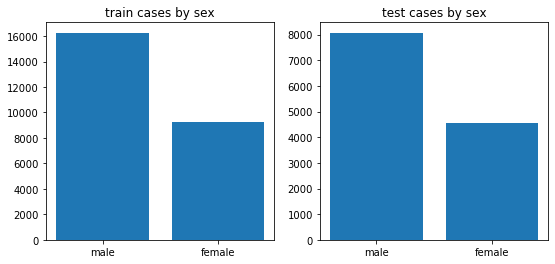

In [215]:
# sex attribute
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(cases_train['sex'].value_counts().index,cases_train['sex'].value_counts())
plt.title('train cases by sex')

plt.subplot(1,2,2)
plt.bar(cases_test['sex'].value_counts().index,cases_test['sex'].value_counts())
plt.title('test cases by sex')
plt.show()

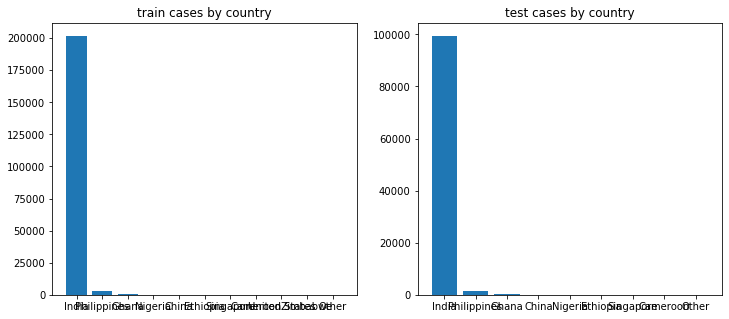

In [216]:
# country attribute
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
values = pd.DataFrame(cases_train['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>25 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('train cases by country')

plt.subplot(1,2,2)
values = pd.DataFrame(cases_test['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>25 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('test cases by country')
plt.show()

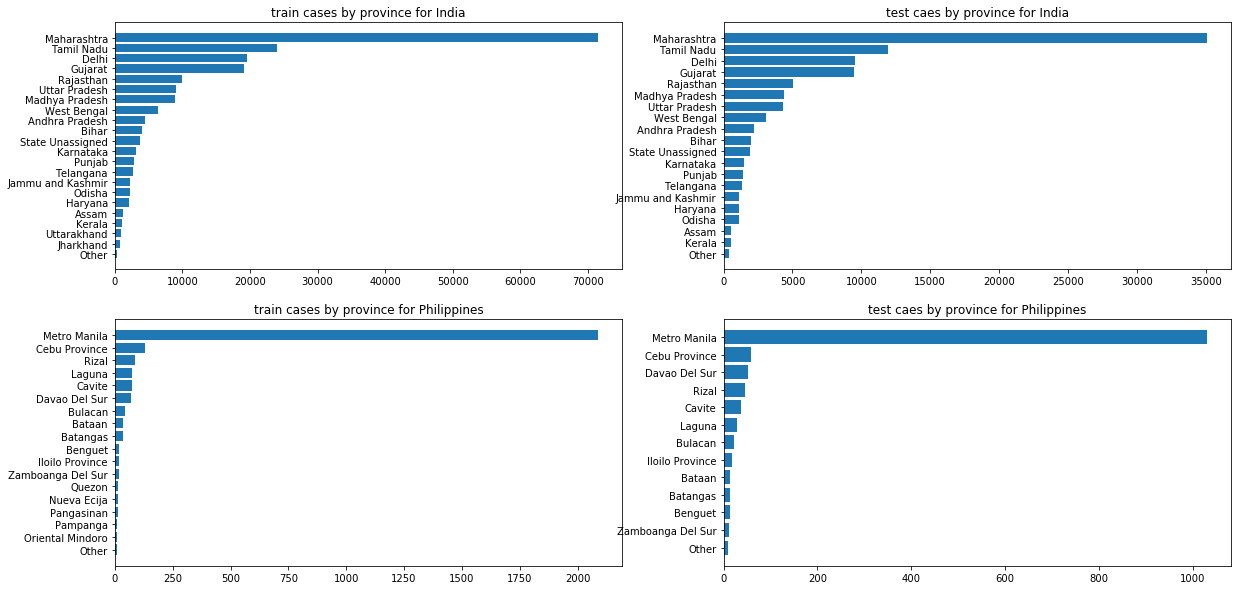

In [217]:
# province attribute
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
values = cases_train[cases_train['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('train cases by province for India')

plt.subplot(2,2,2)
values = cases_test[cases_test['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('test caes by province for India')

plt.subplot(2,2,3)
values = cases_train[cases_train['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('train cases by province for Philippines')

plt.subplot(2,2,4)
values = cases_test[cases_test['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('test caes by province for Philippines')

plt.show()

In [218]:
# latitude / longitude

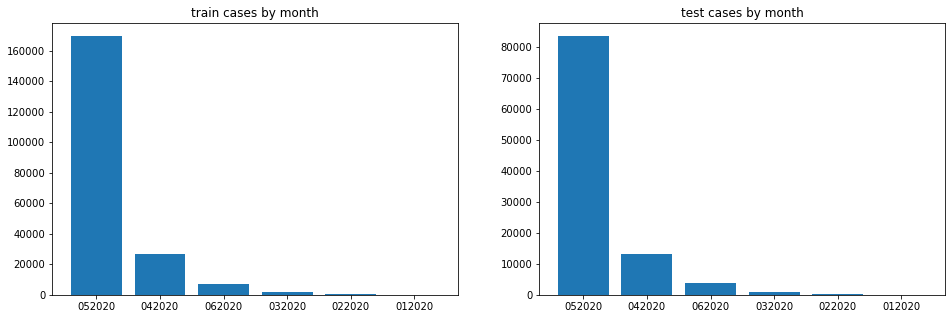

In [219]:
# date_confirmation attribute

# add month attribute
cases_train['month'] = cases_train.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_train = cases_train.replace("", np.NaN)
cases_test['month'] = cases_test.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_test = cases_test.replace("", np.NaN)


plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.bar(cases_train['month'].value_counts().index, cases_train['month'].value_counts())
plt.title('train cases by month')

plt.subplot(1,2,2)
plt.bar(cases_test['month'].value_counts().index, cases_test['month'].value_counts())
plt.title('test cases by month')
plt.show()

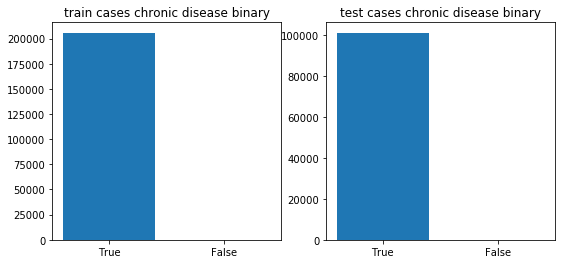

In [220]:
# chronic disease  attribute
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(['True','False'],cases_train['chronic_disease_binary'].value_counts())
plt.title('train cases chronic disease binary')

plt.subplot(1,2,2)
plt.bar(['True','False'],cases_test['chronic_disease_binary'].value_counts())
plt.title('test cases chronic disease binary')
plt.show()

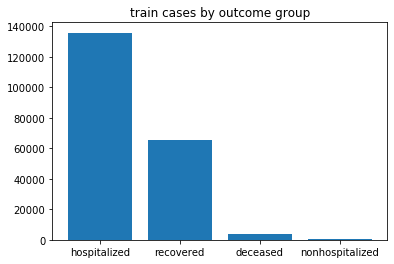

In [221]:
#outcome group attribute
plt.bar(cases_train['outcome_group'].value_counts().index,cases_train['outcome_group'].value_counts())
plt.title('train cases by outcome group')
plt.show()

### 1.3.2 location dataset

In [222]:
stats_cases_location = cases_location.describe(include="all").round(2)
stats_cases_location = stats_cases_location.append(pd.DataFrame([cases_location.isna().sum()], index=['null'])) # add count of null values
#stats_cases_location = stats_cases_location.iloc[[0,11,1, 4, 5, 6, 10]] # keep [count, null, unique]
stats_cases_location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Population
count,4004,4004,4004,3915.00,3915.00,4004.00,4004.00,729.00,729.00,4004,3914.00,3956.00,3.908000e+03
unique,594,196,9,NaN,NaN,NaN,NaN,NaN,NaN,4004,NaN,NaN,NaN
top,Texas,United States,2021-04-01 04:27:05,NaN,NaN,NaN,NaN,NaN,NaN,"Brunswick, North Carolina, US",NaN,NaN,NaN
freq,255,3277,3989,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,35.82,-71.33,32300.36,726.71,100300.81,36416.57,NaN,8171.70,2.75,1.971467e+06
std,NaN,NaN,NaN,13.23,54.89,166884.39,4083.39,274010.22,218469.87,NaN,3915.61,42.19,1.147747e+07
min,NaN,NaN,NaN,-52.37,-178.12,0.00,0.00,0.00,0.00,NaN,0.00,0.00,1.690000e+02
25%,NaN,NaN,NaN,33.21,-96.59,1040.75,17.00,476.00,246.00,NaN,5931.16,1.20,1.390325e+04
50%,NaN,NaN,NaN,37.90,-86.76,2885.50,53.00,13740.00,2602.00,NaN,8754.61,1.78,3.762900e+04
75%,NaN,NaN,NaN,42.18,-77.39,11581.00,184.50,61640.00,19558.00,NaN,10706.94,2.51,2.017642e+05


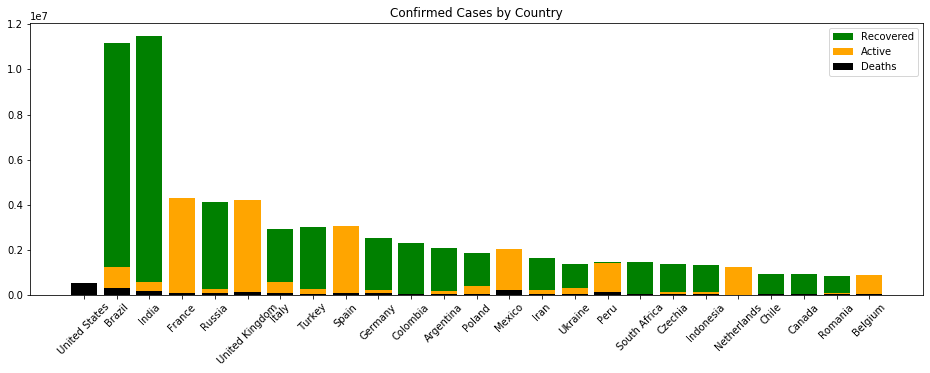

In [223]:
# confirmed, recovered, active, deaths attribute
values = cases_location.groupby('Country_Region').sum()
values = values.nlargest(25, 'Confirmed')

plt.figure(figsize=(16,5))
plt.bar(values.index, values['Recovered'], color='green')
plt.bar(values.index, values['Active'], color='orange')
plt.bar(values.index, values['Deaths'],  color='black')
plt.xticks(rotation=45)
plt.legend(['Recovered', 'Active', 'Deaths'])
plt.title('Confirmed Cases by Country')
plt.show()

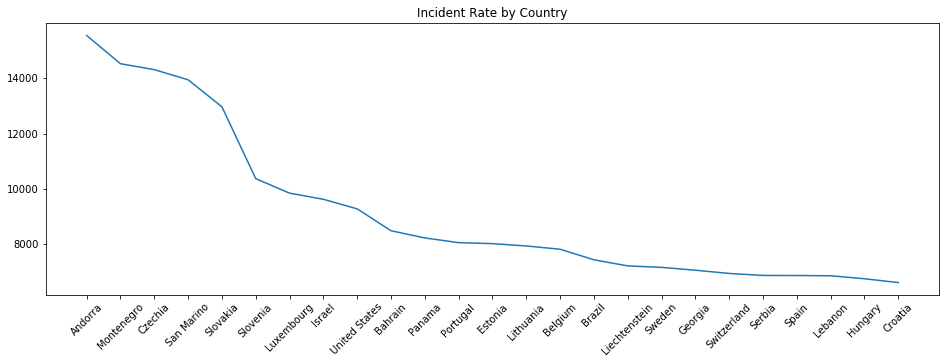

In [224]:
# incident rate attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Incident_Rate')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Incident_Rate'])
plt.xticks(rotation=45)
plt.title('Incident Rate by Country')
plt.show()

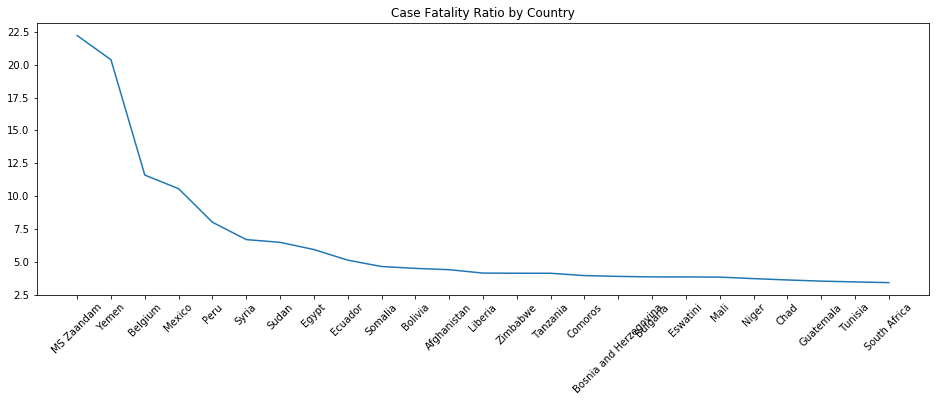

In [225]:
# case_fatality attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Case_Fatality_Ratio')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Case_Fatality_Ratio'])
plt.xticks(rotation=45)
plt.title('Case Fatality Ratio by Country')
plt.show()

## 1.4 Data Cleaning and Imputing Missing Values
Datasets involved: cases_2021_train.csv, cases_2021_test.csv, location_2021.csv

In [226]:
# Primary: age column -> remove all entries that are NaN
# format age to standard integer
# potential approaches: 

# other columns -> impute, what strategies can we use to impute missing values of different columns
# additional information: best action is replace NaN with ""

In [227]:
# Removing NaN's from age column in train and test datasets

cases_train = cases_train[cases_train['age'].notna()].reset_index()
cases_test = cases_test[cases_test['age'].notna()].reset_index()


In [228]:
age_range = cases_train[cases_train['age'].str.contains('-') == True].reset_index(drop=True)

In [229]:
age_range.iloc[0]['age']

'22-80'

In [230]:
# age range greater than 10 should be removed?

def range_to_num(age):
    range = 10

    a_list = age.split('-')
    map_ints = map(float, a_list)
    map_list = list(map_ints)

    if (len(map_list) == 1):
        return round(map_list[0])

    if ((map_list[1] - map_list[0]) > range):
        return 'remove'
    else:
        return round((map_list[1] + map_list[0]) / 2)


In [231]:
cases_train = cases_train.drop(columns=['index'])
cases_test = cases_test.drop(columns=['index'])

In [232]:
# STEPS TO CLEAN VALUES IN AGE COLUMN
#1. Format all values with 'x-x' range to a single int value or 'remove'
#2. Remove all entries labelled 'remove' 
#3. Convert all column entries to int
#4. Use round() on all values to get rid of 0.3, 0.5, 0.8 values -> some babies

In [233]:
# Cleaning train dataset - age

cases_train['age'] = cases_train['age'].apply(lambda x: range_to_num(x))
cases_train = cases_train[cases_train['age'] != 'remove']
cases_train['age'] = pd.to_numeric(cases_train['age'])
cases_train['age'] = cases_train['age'].apply(lambda x: round(x))

ValueError: could not convert string to float: 

In [234]:
# Cleaning test dataset - age

cases_test['age'] = cases_test['age'].apply(lambda x: range_to_num(x))
cases_test = cases_test[cases_test['age'] != 'remove']
cases_test['age'] = pd.to_numeric(cases_test['age'])
cases_test['age'] = cases_test['age'].apply(lambda x: round(x))

In [235]:
# sex	province	country	latitude	longitude	date_confirmation	additional_information	source	chronic_disease_binary	outcome_group
# sex: NaN convert to 'unknown'
# province: can use latitude and longitude to get province -> need to find appropriate dataset / function to determine geographical location
# country: has no NaN values -> is okay
# date_confirmation: some NaN values -> think its okay to keep these entries -> convert NaN's to 'unknown'
# additional_information: some NaN values -> convert to 'unknown'
# source: some NaN values -> convert to 'unknown'
# chronic_disease_binary: no NaN values
# outcome_group: no NaN values



In [236]:
cases_train[cases_train['outcome_group'].isna()]

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group,closest_province,month


## 1.5 Dealing with outliers
Datasets involved: cases_2021_train.csv, cases_2021_test.csv, location_2021.csv

## 1.6 Joining the cases and location dataset

In [245]:
def fix_country(country):
    if country == 'Korea, South':
        return 'South Korea'
    if country == 'US':
        return 'United States'
    return country

cases_location['Province_State'].fillna('', inplace=True)
cases_location['Country_Region'] = cases_location['Country_Region'].apply(fix_country)
cases_location['Population'] = cases_location['Confirmed'] * 100000 / cases_location['Incident_Rate']
grouped_locations = cases_location.groupby(['Province_State', 'Country_Region']).agg({'Lat': 'mean', 
                                                                                      'Long_': 'mean', 
                                                                                      'Confirmed': 'sum',
                                                                                     'Deaths': 'sum',
                                                                                     'Recovered': 'sum',
                                                                                     'Active': 'sum',
                                                                                     'Population': 'sum'}).reset_index()
grouped_locations['Incident_Rate'] = grouped_locations['Confirmed'] / grouped_locations['Population'] * 100000 
grouped_locations['Case_Fatality_Ratio'] = grouped_locations['Deaths'] / grouped_locations['Confirmed'] * 100 
grouped_locations[grouped_locations['Country_Region'] == 'India']

location_set = set()

def add_to_location_set(row):
    location_set.add((row['Province_State'], row['Country_Region']))
    
grouped_locations.apply(add_to_location_set, axis=1)
grouped_locations[grouped_locations['Country_Region'] == 'Philippines']

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Population,Incident_Rate,Case_Fatality_Ratio
122,,Philippines,12.879721,121.774017,747288,13297,603746.0,130245.0,109581085.0,681.949809,1.779368


In [247]:
#cases_train['province'].fillna('', inplace=True)
numNotFound = 0
numOptions = 0

def get_closest_province(row):
    global numNotFound
    global numOptions
    if (row['province'], row['country']) in location_set:
        return row['province']
    options = grouped_locations[grouped_locations['Country_Region'] == row['country']]
    numNotFound += 1
    numOptions += len(options)
    if(len(options) == 0):
        print(row['country'])

cases_train['closest_province'] = cases_train.apply(get_closest_province, axis=1)
print(numOptions / numNotFound)



nan
1.0643802647412757


In [48]:
combined_train = pd.merge(cases_train, cases_location, how='inner', left_on=['country', 'province'], right_on = ['Country_Region', 'Province_State'])

In [49]:
combined_train[combined_train['country'] == 'South Korea']

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,...,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
199610,55,male,NaN,South Korea,37.558056,126.790556,24.01.2020,Case 2,https://www.e-epih.org/journal/view.php?doi=10...,False,...,2021-04-01 04:27:05,35.907757,127.766922,103639,1735,95439.0,6465.0,"Korea, South",202.146775,1.67408
